# Task 2
## Predictive modeling of customer bookings

# Exploratory data analysis
First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cws = os.getcwd()
df = pd.read_csv(cws +"/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

Before we compute any statistics on the data, lets do any necessary data conversion

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}
df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [8]:
df.flight_day.value_counts()

1    8102
3    7674
2    7673
4    7424
5    6761
7    6554
6    5812
Name: flight_day, dtype: int64

## sales channel

In [9]:
per_internet = df.sales_channel.value_counts().values[0]  / df.sales_channel.count() *100
per_mobile = df.sales_channel.value_counts().values[1]  / df.sales_channel.count() *100
print(f"Number of bookings done through internet: {per_internet} %")
print(f"Number of bookings done through phone call: {per_mobile} %")

Number of bookings done through internet: 88.764 %
Number of bookings done through phone call: 11.236 %


## Trip type

In [10]:
per_round = df.trip_type.value_counts().values[0]/ df.trip_type.count() *100
per_oneway = df.trip_type.value_counts().values[1]/ df.trip_type.count() *100
per_circle = df.trip_type.value_counts().values[2]/ df.trip_type.count() *100
print(f"Percentage of round trips: {per_round} %")
print(f"Percentage of One way trips: {per_oneway} %")
print(f"Percentage of circle trips: {per_circle} %")

Percentage of round trips: 98.994 %
Percentage of One way trips: 0.774 %
Percentage of circle trips: 0.232 %


### Purchase lead

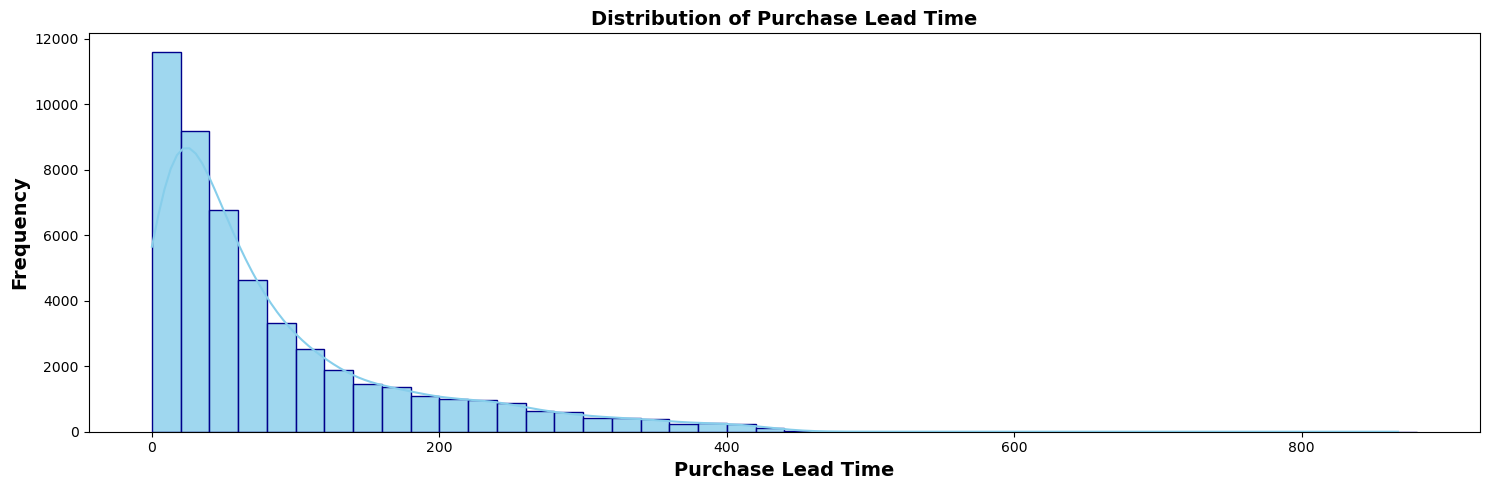

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

# Create the histogram plot with custom styling
sns.histplot(data=df, x="purchase_lead", binwidth=20, kde=True,
             color='skyblue', edgecolor='darkblue',
             kde_kws={'bw_method': 0.2},  # Set KDE line width with 'bw_method'
             alpha=0.8)

# Set custom font properties for title, x-axis, and y-axis labels
plt.title("Distribution of Purchase Lead Time", fontweight='bold', fontsize=14)
plt.xlabel("Purchase Lead Time", fontweight='bold', fontsize=14)
plt.ylabel("Frequency", fontweight='bold', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


# Train ML Model with RandomForest
Now fist install scikit-learn.


In [12]:
# import liberaries
import pandas as pd
import numpy as np


In [13]:
# Load your dataset into a Pandas DataFrame
data = df

# Print the column names
print(data.columns)

# Print the first few rows of the DataFrame to inspect the data
data.head()


Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [14]:
from sklearn.preprocessing import OneHotEncoder


#create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#one hot encode Sales Channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
data = data.join(encoder_df)

#one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
data = data.join(encoder_df)

In [15]:
#drop categorical columns now
data.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)

In [16]:
#store the label for supervised learning
label = df['booking_complete']

In [17]:
data= data.drop('booking_complete', axis=1)

In [18]:
data

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,2,262,19,7,6,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,6,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,6,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49996,1,111,6,4,7,0,0,0,5.62,1.0,0.0,0.0,0.0,1.0
49997,1,24,6,22,6,0,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49998,1,15,6,11,1,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0


## Normalizaing the values

In [19]:
from sklearn.preprocessing import StandardScaler

#create a standard scaler object
scaler = StandardScaler()

#fit and transform the data
scaled_df = scaler.fit_transform(data)

In [20]:
#create a dataframe of scled data
scaled_df = pd.DataFrame(scaled_df, columns = data.columns)

In [21]:
# add the labels back to the dataframe
scaled_df['label']  = label
scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,0.400684,1.957530,-0.119353,-0.381764,1.096754,0.703747,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
1,-0.579559,0.299164,-0.089844,-1.120780,1.096754,-1.420965,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
2,0.400684,1.747470,-0.030824,1.465775,-0.408687,0.703747,1.538654,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
3,-0.579559,0.122272,0.234761,-0.936026,1.096754,-1.420965,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
4,0.400684,-0.187290,-0.030824,1.096267,-0.408687,0.703747,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.400684,-0.640577,-0.502977,-0.012257,1.096754,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49996,-0.579559,0.288108,-0.502977,-0.936026,1.598567,-1.420965,-0.649919,-0.863497,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49997,-0.579559,-0.673744,-0.502977,2.389544,1.096754,-1.420965,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49998,-0.579559,-0.773246,-0.502977,0.357251,-1.412314,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0


## correlation matrix

<Axes: >

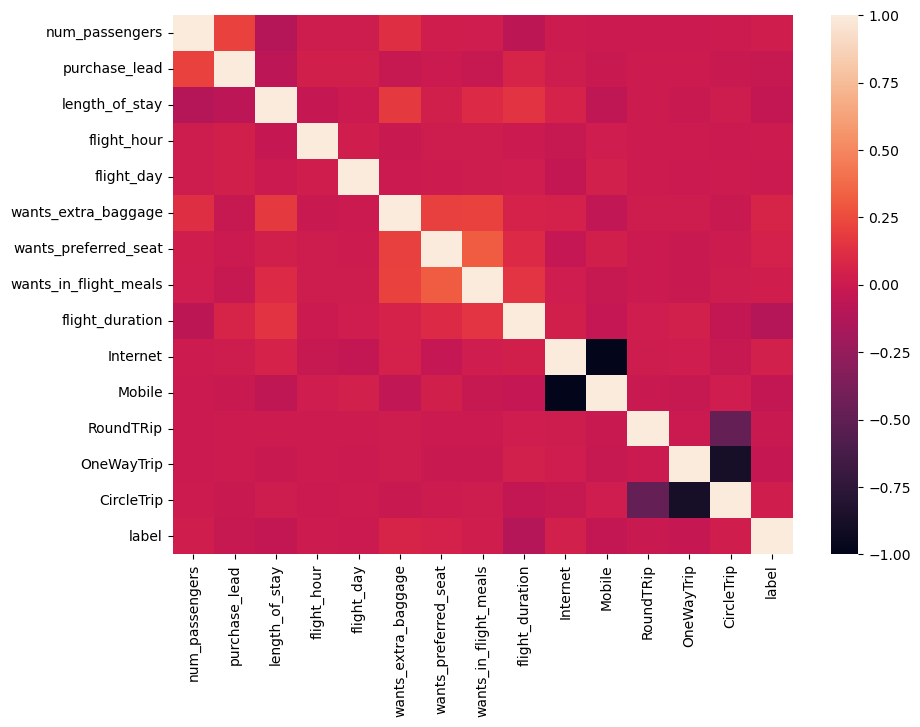

In [22]:
corr = scaled_df.corr()

plt.figure(figsize=(10,7))

#plot the heatmap
sns.heatmap(corr)

## Splitting Train and Test Data

In [23]:
from sklearn.model_selection import train_test_split

X = scaled_df.iloc[:,:-1]
y = scaled_df['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [25]:
'''
 Create functions to fit and predict the values of whether customer would complete the booking.
    Also functions with metrics to evaluate the model prediction.
'''
def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

# Random Forest Classifier


In [26]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

## Checking Training accuracy


In [27]:
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)

#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train),2) 

#accuracy score for training data
acc = round(accuracy_score(y_train, y_pred_train),2) 

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),2) 

print(f"""
      Accuracy={acc},
      Precision={pre},
      and F1-score ={f1} """)



      Accuracy=0.93,
      Precision=1.0,
      and F1-score =0.72 


0.934325

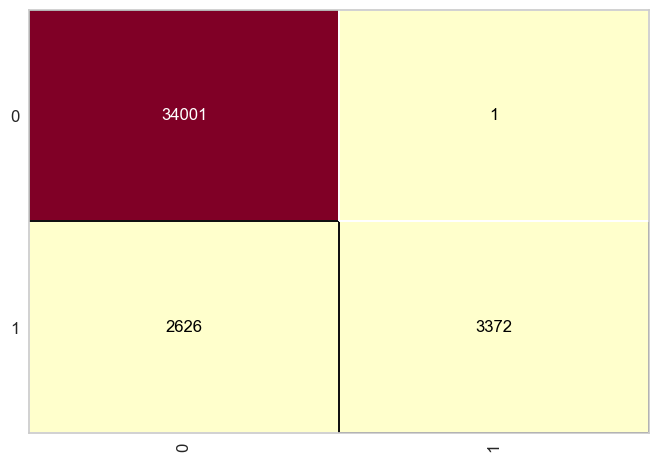

In [28]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_train, y_train)

## Checking Testing accuracy

In [29]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 
print(f"""
      Accuracy={acc},
      Precision={pre},
      and F1-score ={f1} """)


      Accuracy=0.85,
      Precision=0.51,
      and F1-score =0.08 


0.8523

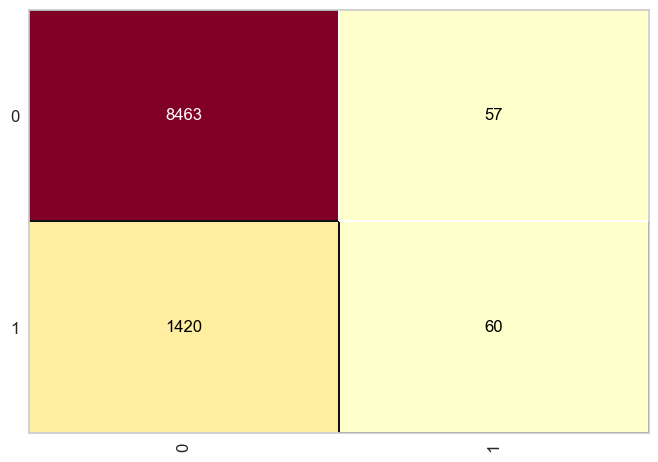

In [30]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

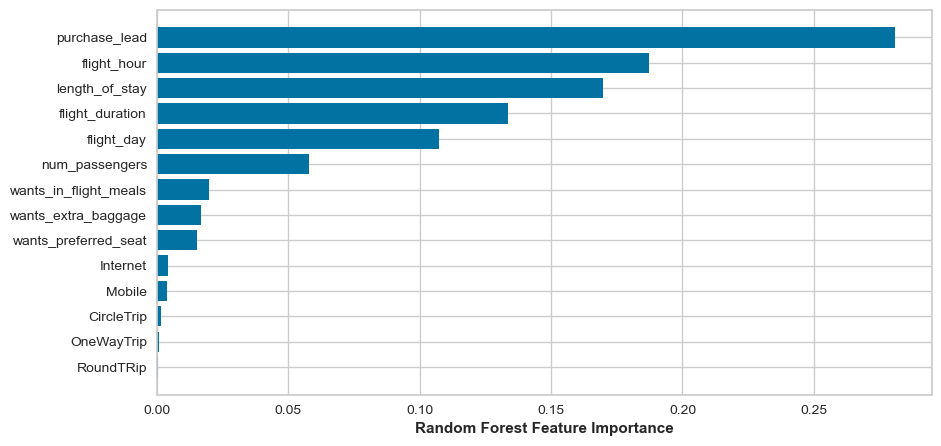

In [32]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance", fontweight="bold")
plt.savefig('Random Forest Feature Importance.png', bbox_inches='tight')
plt.show()

Precision: 51.28%
Recall: 4.05%


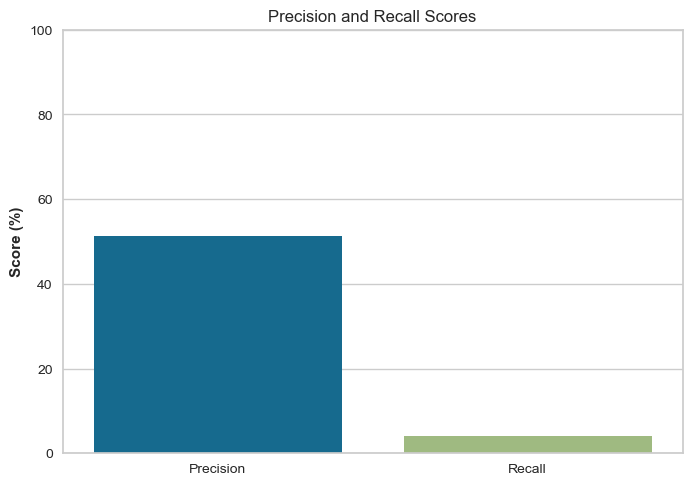

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score

# Fit the model on the training data and make predictions
clf_rf.fit(X_train, y_train)
y_pred_test = clf_rf.predict(X_test)

# Calculate precision and recall scores
precision = precision_score(y_test, y_pred_test) * 100
recall = recall_score(y_test, y_pred_test) * 100

print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")

# Create a bar plot to visualize precision and recall
scores = {'Precision': precision, 'Recall': recall}
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.ylabel('Score (%)', fontweight='bold')
plt.title('Precision and Recall Scores')
plt.ylim(0, 100)
plt.show()


One major problem behind getting low F1 score is imbalanced dataset. We have higher entries that are classified 0 than 1. We could reduce the number of entries that are classified 0 to be equal around the number of entries that are classified as 1.
## Balancing the dataset

In [39]:
scaled_df.label.value_counts()

0    42522
1     7478
Name: label, dtype: int64

In [40]:
#create a dataframe having all labels 0 with 10000 samples
scaled_df_0 = scaled_df[scaled_df.label ==0].sample(n=8000)

In [41]:
#concatenate the two dataframee, one havng all labels 0 and other having all labels as 1
scaled_df_new = pd.concat([scaled_df[scaled_df.label==1], scaled_df_0], ignore_index=True)

In [44]:
scaled_df_new.label.value_counts()

0    8000
1    7478
Name: label, dtype: int64

In [46]:
#shuffle the dataframe rows
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)

In [47]:
scaled_df_new

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,1.380928,0.387610,-0.502977,1.096267,1.096754,0.703747,1.538654,1.158082,1.037139,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
1,-0.579559,1.294184,-0.502977,-0.751272,1.096754,0.703747,-0.649919,-0.863497,-1.742035,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
2,1.380928,0.476056,-0.001315,0.172497,-0.408687,0.703747,-0.649919,1.158082,-0.439297,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
3,0.400684,-0.518963,-0.532487,-0.381764,0.093127,0.703747,1.538654,-0.863497,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
4,0.400684,-0.717967,-0.502977,-1.120780,-0.408687,0.703747,1.538654,1.158082,1.037139,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15473,-0.579559,-0.629521,-0.650525,0.542005,1.598567,0.703747,-0.649919,-0.863497,1.037139,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
15474,0.400684,-0.331015,-0.502977,-0.381764,0.594940,0.703747,-0.649919,-0.863497,-1.742035,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
15475,-0.579559,-0.629521,-0.532487,0.172497,-0.910501,-1.420965,-0.649919,-0.863497,1.037139,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
15476,-0.579559,-0.507908,-0.561996,-0.566518,-0.910501,-1.420965,-0.649919,-0.863497,-1.742035,-2.810688,2.810688,-0.048222,-0.08832,0.100808,0


In [48]:
X = scaled_df_new.iloc[:,:-1]
y = scaled_df_new['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [49]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(n_estimators=50,max_depth =50 , min_samples_split=5,random_state=0)

Accuracy: 60.37%
Precision: 58.43%
F1-score: 57.85%
Recall: 57.28%
Specificity: 63.16%


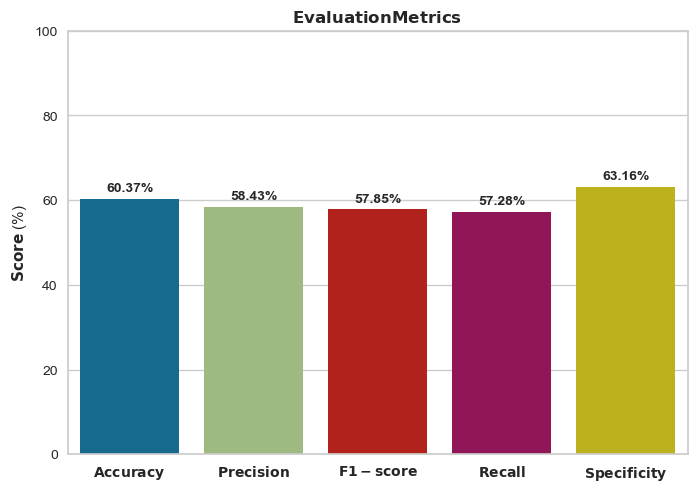

In [71]:


# Fit the model on the training data and make predictions
clf_rf.fit(X_train, y_train)
y_pred_test = clf_rf.predict(X_test)

# Calculate evaluation metrics
f1 = round(f1_score(y_test, y_pred_test) * 100, 2)
accuracy = round(accuracy_score(y_test, y_pred_test) * 100, 2)
precision = round(precision_score(y_test, y_pred_test) * 100, 2)
recall = round(recall_score(y_test, y_pred_test) * 100, 2)
specificity = round(recall_score(y_test, y_pred_test, pos_label=0) * 100, 2)

print(f"Accuracy: {accuracy}%")
print(f"Precision: {precision}%")
print(f"F1-score: {f1}%")
print(f"Recall: {recall}%")
print(f"Specificity: {specificity}%")

# Create a bar plot to visualize evaluation metrics
metrics = {
    r'$\bf{Accuracy}$': accuracy,
    r'$\bf{Precision}$': precision,
    r'$\bf{F1-score}$': f1,
    r'$\bf{Recall}$': recall,
    r'$\bf{Specificity}$': specificity
}

sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.ylabel(r'$\bf{Score}$ (%)')
plt.title(r'$\bf{Evaluation Metrics}$')

# Annotate the bars with their corresponding numeric values
ax = plt.gca()
for idx, val in enumerate(metrics.values()):
    ax.text(idx, val + 1, str(val) + '%', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.ylim(0, 100)
plt.savefig('Evaluation metrics.png', bbox_inches='tight')         
plt.show()

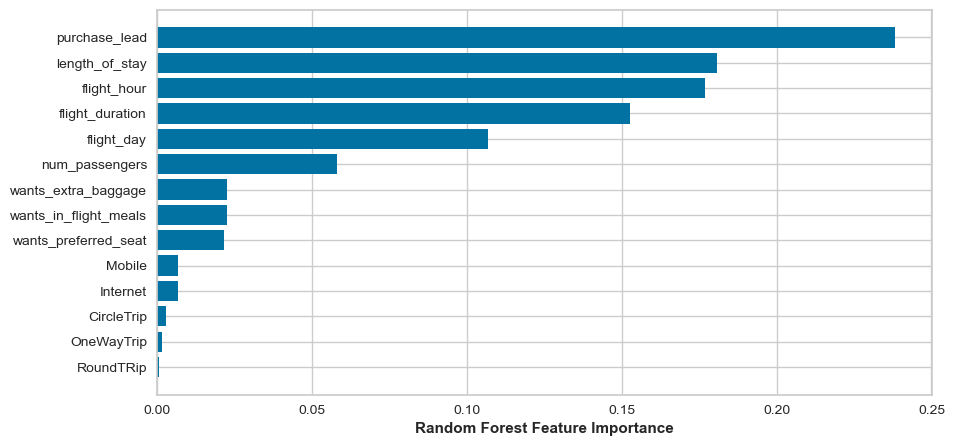

In [72]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance", fontweight="bold")
plt.savefig('Random Forest Feature Importance.png', bbox_inches='tight')
plt.show()